In [2]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files manually


Saving description.csv to description.csv
Saving diets.csv to diets.csv
Saving medications.csv to medications.csv
Saving precautions_df.csv to precautions_df.csv
Saving symptoms_df.csv to symptoms_df.csv
Saving Symptom-severity.csv to Symptom-severity.csv
Saving Training.csv to Training.csv
Saving workout_df.csv to workout_df.csv


In [10]:
datasets = {
    'description': description,
    'diets': diets,
    'medications': medications,
    'precautions_df': precautions_df,
    'symptoms_df': symptoms_df,
    'symptom_severity': symptom_severity,
    'training': training,
    'workout_df': workout_df
}

for name, df in datasets.items():
    print(f"--- {name} ---")
    print(df.info())
    print(df.head())
    print("\n")
# Check the first few rows of one dataframe to confirm
print(description.head())

--- description ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None
               Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...


--- diets ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  41 non-null   

In [13]:
print(training.columns)
print(training['prognosis'].value_counts())


print("symptoms_df columns:", symptoms_df.columns)

# Display column names
print("Description columns:", description.columns.tolist())
print("Diets columns:", diets.columns.tolist())
print("Medications columns:", medications.columns.tolist())
print("Precautions columns:", precautions_df.columns.tolist())
print("Symptoms columns:", symptoms_df.columns.tolist())
print("Symptom Severity columns:", symptom_severity.columns.tolist())
print("Training columns:", training.columns.tolist())
print("Workout columns:", workout_df.columns.tolist())


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cer

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Symptoms are all columns except 'prognosis'
symptom_columns = training.columns[:-1].tolist()

X = training[symptom_columns]
y = training['prognosis']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [ ]:
import joblib

joblib.dump(model, 'disease_prediction_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

from google.colab import files

files.download('disease_prediction_model.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

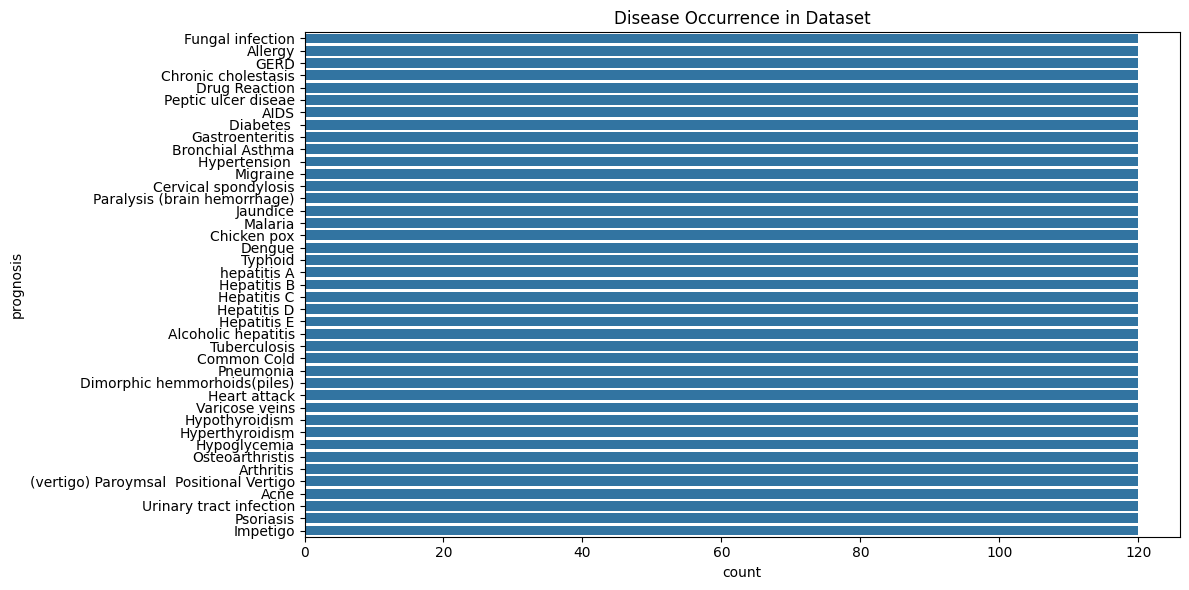

In [15]:
#📈 Exploratory Data Analysis (EDA)
#📊 Disease Frequency
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=training, y='prognosis', order=training['prognosis'].value_counts().index)
plt.title('Disease Occurrence in Dataset')
plt.tight_layout()
plt.show()


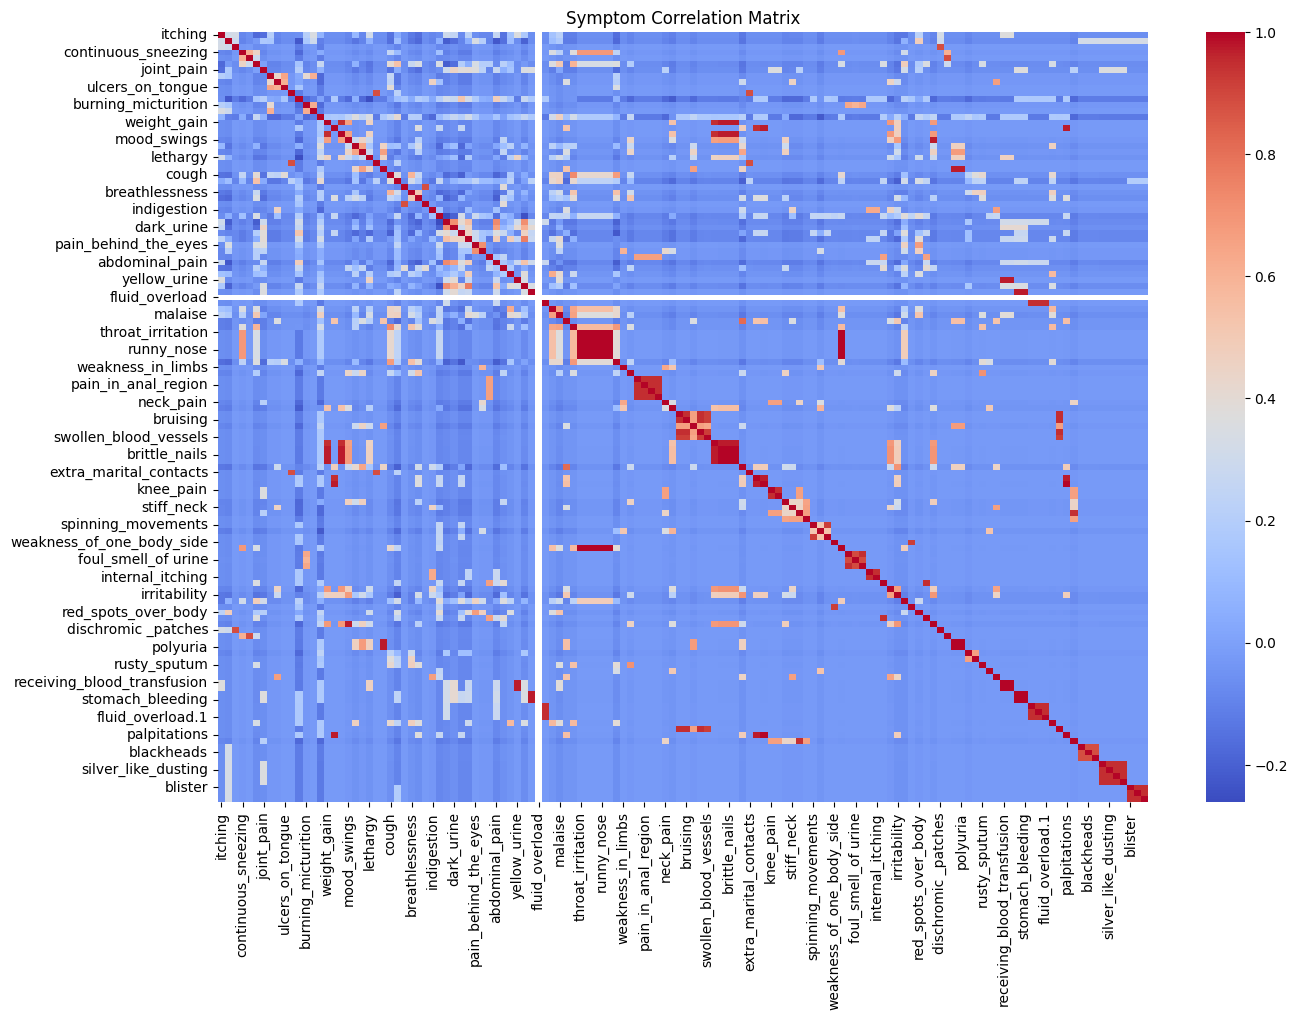

In [16]:
#📉 Symptom Correlation Heatmap
import seaborn as sns

corr = training.drop(columns='prognosis').corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Symptom Correlation Matrix')
plt.show()


In [18]:
#✅ Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
#✅ Support Vector Machine
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)


SVC()

In [19]:
#✅ XGBoost
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)